
Statistiques descriptives de l'impulsion totale :
count    12167.000000
mean        84.886130
std         35.401905
min         50.551154
25%         52.600070
50%         64.644591
75%        124.554880
max        146.658141
Name: p, dtype: float64


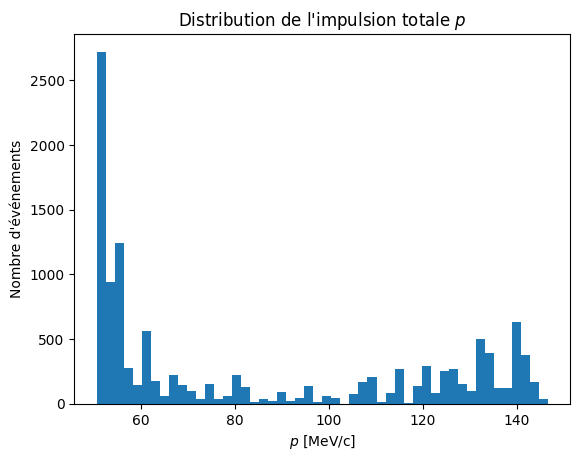

In [8]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

MASS_MEV    = 0.511     # mc^2 en MeV (électron)


# Chargement du fichier ROOT et lecture de l'arbre 'momenta'
file = uproot.open("./build/output_50000_filtered50.root")
tree = file["momenta"]

# Extraction des colonnes dans un DataFrame Pandas
df = tree.arrays(["eventID", "px", "py", "pz"], library="pd")

# Calcul de l'impulsion totale p
df["p"] = np.sqrt(df["px"]**2 + df["py"]**2 + df["pz"]**2)

# Statistiques descriptives pour l'impulsion totale
print("\nStatistiques descriptives de l'impulsion totale :")
print(df["p"].describe())

# Histogramme de l'impulsion totale
plt.figure()
plt.hist(df["p"], bins=50)
plt.title("Distribution de l'impulsion totale $p$")
plt.xlabel("$p$ [MeV/c]")
plt.ylabel("Nombre d'événements")
plt.show()



Statistiques T [MeV]:
count    12167.000000
mean        84.376940
std         35.401254
min         50.042736
25%         52.091552
50%         64.135611
75%        124.044928
max        146.148031
dtype: float64


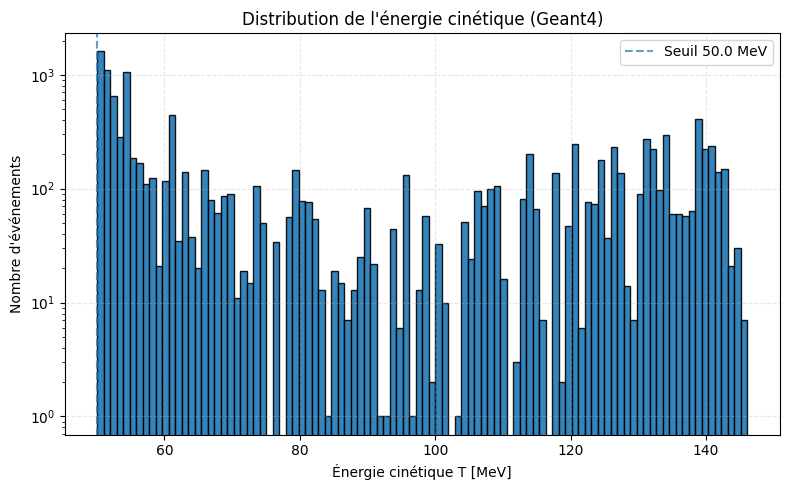

Total (somme des bins) ~ len(T) : 12167
Part des événements avec T > 50.0 MeV : 100.00%


In [9]:
# Impulsion et énergie cinétique
p = np.sqrt(df["px"]**2 + df["py"]**2 + df["pz"]**2)   # MeV/c
ratio = p.to_numpy() / MASS_MEV
T = MASS_MEV * (np.sqrt(1.0 + ratio**2) - 1.0)         # MeV
E_THRESHOLD = 50.0       # repère visuel, en MeV
# Stats rapides
print("\nStatistiques T [MeV]:")
print(pd.Series(T).describe())

# Histogramme non pondéré
plt.figure(figsize=(8,5))
plt.hist(T, bins=100, edgecolor="black", alpha=0.9, log=True)
plt.axvline(E_THRESHOLD, ls="--", alpha=0.7, label=f"Seuil {E_THRESHOLD} MeV")
plt.xlabel("Énergie cinétique T [MeV]")
plt.ylabel("Nombre d'événements")
plt.title("Distribution de l'énergie cinétique (Geant4)")
plt.grid(alpha=0.3, ls="--")
plt.legend()
plt.tight_layout()
plt.show()

# Sanity checks
print(f"Total (somme des bins) ~ len(T) : {len(T)}")
frac_over = (T > E_THRESHOLD).mean() * 100
print(f"Part des événements avec T > {E_THRESHOLD} MeV : {frac_over:.2f}%")

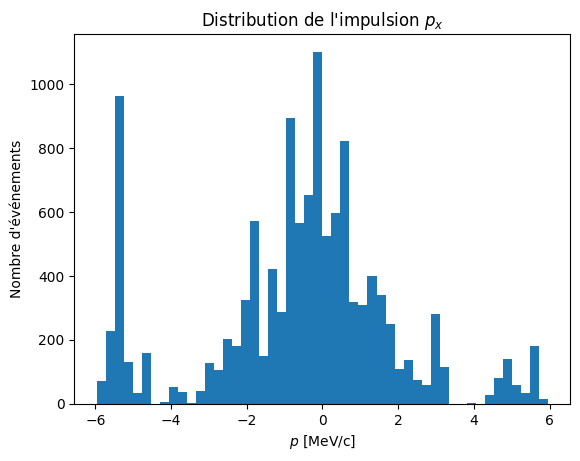


Statistiques descriptives de l'impulsion :
count    12167.000000
mean        -0.575135
std          2.488760
min         -5.958772
25%         -1.752039
50%         -0.256045
75%          0.676019
max          5.954267
Name: px, dtype: float64


In [10]:
# Histogramme de l'impulsion totale
plt.figure()
plt.hist(df["px"], bins=50)
plt.title("Distribution de l'impulsion $p_x$")
plt.xlabel("$p$ [MeV/c]")
plt.ylabel("Nombre d'événements")
plt.show()

print("\nStatistiques descriptives de l'impulsion :")
print(df["px"].describe())


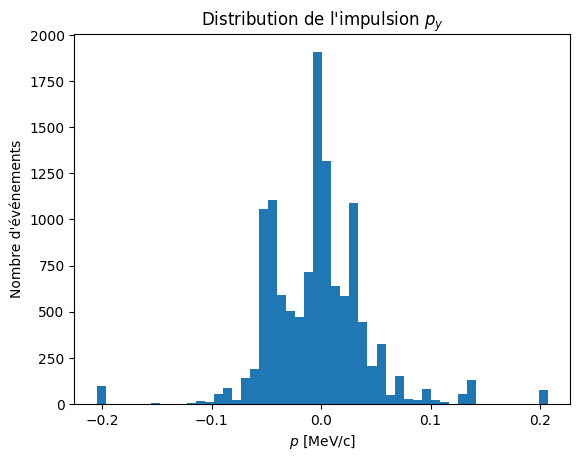


Statistiques descriptives de l'impulsion :
count    12167.000000
mean        -0.003807
std          0.045905
min         -0.204775
25%         -0.035714
50%         -0.001437
75%          0.021001
max          0.207204
Name: py, dtype: float64


In [11]:
# Histogramme de l'impulsion totale
plt.figure()
plt.hist(df["py"], bins=50)
plt.title("Distribution de l'impulsion $p_y$")
plt.xlabel("$p$ [MeV/c]")
plt.ylabel("Nombre d'événements")
plt.show()

print("\nStatistiques descriptives de l'impulsion :")
print(df["py"].describe())

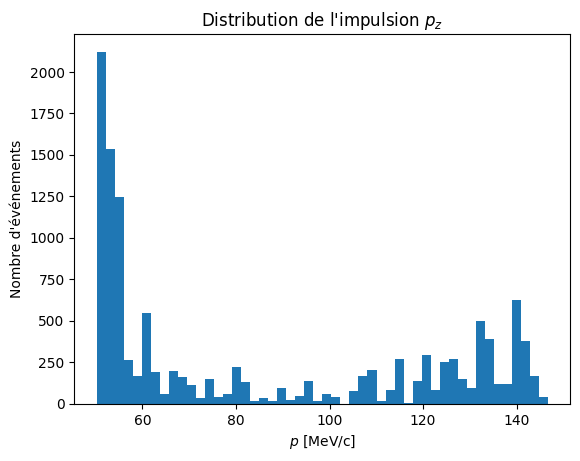


Statistiques descriptives de l'impulsion :
count    12167.000000
mean        84.830414
std         35.443259
min         50.305399
25%         52.599019
50%         64.411367
75%        124.548643
max        146.656967
Name: pz, dtype: float64


In [12]:
# Histogramme de l'impulsion totale
plt.figure()
plt.hist(df["pz"], bins=50)
plt.title("Distribution de l'impulsion $p_z$")
plt.xlabel("$p$ [MeV/c]")
plt.ylabel("Nombre d'événements")
plt.show()

print("\nStatistiques descriptives de l'impulsion :")
print(df["pz"].describe())

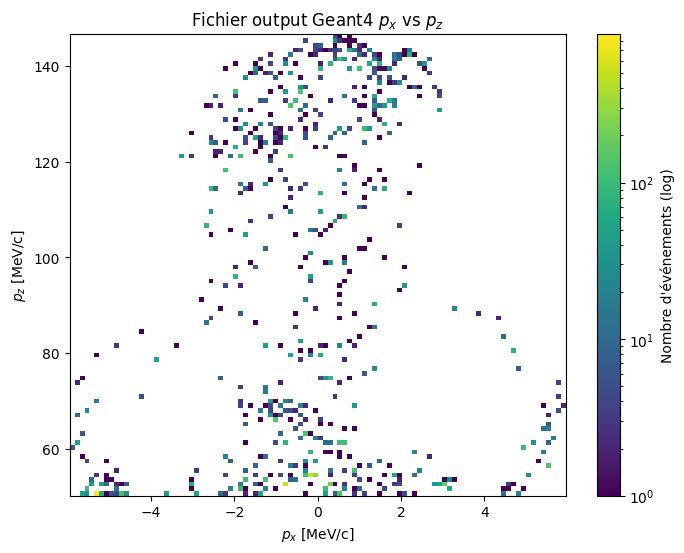

In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Histogramme 2D px vs pz en échelle log
plt.figure(figsize=(8, 6))
hist = plt.hist2d(
    df["px"], df["pz"],
    bins=100,
    cmap="viridis",
    norm=LogNorm()          # Échelle logarithmique
)
plt.colorbar(hist[3], label="Nombre d'événements (log)")
plt.title("Fichier output Geant4 $p_x$ vs $p_z$")
plt.xlabel("$p_x$ [MeV/c]")
plt.ylabel("$p_z$ [MeV/c]")
plt.show()


In [14]:
"""import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# ─── 1) Chargement du fichier ROOT et lecture de l'arbre 'momenta' ─────────────
file = uproot.open("./build/output.root")
tree = file["momenta"]

# Extraction des colonnes dans un DataFrame Pandas
df = tree.arrays(["eventID", "px", "py", "pz"], library="pd")

# ─── 2) Calcul de l'impulsion totale p ────────────────────────────────────────
df["p"] = np.sqrt(df["px"]**2 + df["py"]**2 + df["pz"]**2)

# ─── 3) Calcul de l'énergie cinétique en MeV ───────────────────────────────────
MASS_E_MEV = 0.511    # masse de l'électron en MeV/c²
E_tot = np.sqrt(df["p"]**2 + MASS_E_MEV**2)
df["E_kin"] = E_tot - MASS_E_MEV

# ─── 4) Filtrage énergétique ──────────────────────────────────────────────────
E_THRESHOLD = 1.0  # MeV
df_filtered = df[df["E_kin"] > E_THRESHOLD]

print(f"Nombre total de particules : {len(df)}")
print(f"Nombre après filtrage (E > {E_THRESHOLD} MeV) : {len(df_filtered)}")

# ─── 5) Histogramme 2D px vs pz en échelle log ────────────────────────────────
plt.figure(figsize=(8, 6))
hist = plt.hist2d(
    df_filtered["px"], df_filtered["pz"],
    bins=100,
    cmap="viridis",
    norm=LogNorm(vmin=1)  # Échelle logarithmique
)
plt.colorbar(hist[3], label=f"Nombre d'événements (E > {E_THRESHOLD} MeV)")
plt.title("Fichier output Geant4 $p_x$ vs $p_z$ filtré en énergie")
plt.xlabel("$p_x$ [MeV/c]")
plt.ylabel("$p_z$ [MeV/c]")
plt.show()"""


'import uproot\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom matplotlib.colors import LogNorm\n\n# ─── 1) Chargement du fichier ROOT et lecture de l\'arbre \'momenta\' ─────────────\nfile = uproot.open("./build/output.root")\ntree = file["momenta"]\n\n# Extraction des colonnes dans un DataFrame Pandas\ndf = tree.arrays(["eventID", "px", "py", "pz"], library="pd")\n\n# ─── 2) Calcul de l\'impulsion totale p ────────────────────────────────────────\ndf["p"] = np.sqrt(df["px"]**2 + df["py"]**2 + df["pz"]**2)\n\n# ─── 3) Calcul de l\'énergie cinétique en MeV ───────────────────────────────────\nMASS_E_MEV = 0.511    # masse de l\'électron en MeV/c²\nE_tot = np.sqrt(df["p"]**2 + MASS_E_MEV**2)\ndf["E_kin"] = E_tot - MASS_E_MEV\n\n# ─── 4) Filtrage énergétique ──────────────────────────────────────────────────\nE_THRESHOLD = 1.0  # MeV\ndf_filtered = df[df["E_kin"] > E_THRESHOLD]\n\nprint(f"Nombre total de particules : {len(df)}")\nprint(f"Nombre après filtr